In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib import colormaps
from matplotlib.colors import to_rgba
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter

parser = Sbopen()
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

In [62]:
df_competition = parser.competition()
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB


In [63]:
df_competition.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [64]:
pd.set_option('display.max_columns',None)
df_match = parser.match(competition_id=16, season_id=4)
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,22912,2019-06-01,2019-06-01 21:00:00,0,2,available,scheduled,2022-11-28 14:45:35.628134,2021-06-13 16:17:31.694,13,16,Europe,Champions League,4,2018/2019,38,Tottenham Hotspur,male,None,68,England,81,Mauricio Roberto Pochettino Trossero,Mauricio Pochettino,1972-03-02,11,Argentina,24,Liverpool,male,None,68,England,94,Jürgen Klopp,Jürgen Klopp,1967-06-16,85,Germany,1.1.0,2,2,26,Final,4654,\tEstádio Cívitas Metropolitano,214,Spain,420,Damir Skomina,208,Slovenia


In [65]:
df_lineup = parser.lineup(22912)
df_lineup.head()

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,3043,Christian Dannemann Eriksen,Christian Eriksen,23,22912,38,Tottenham Hotspur,61,Denmark
1,3066,Kyle Walker-Peters,Kyle Walker-Peters,16,22912,38,Tottenham Hotspur,68,England
2,3077,Jan Vertonghen,Jan Vertonghen,5,22912,38,Tottenham Hotspur,22,Belgium
3,3082,Harry Winks,Harry Winks,8,22912,38,Tottenham Hotspur,68,England
4,3083,Heung-Min Son,Son Heung-Min,7,22912,38,Tottenham Hotspur,121,Korea (South)


In [75]:
df_event, df_related, df_freeze, df_tactics = parser.event(22912)

df_event.info()
print("")
df_related.info()
print("")
df_freeze.info()
print("")
df_tactics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3165 non-null   object 
 1   index                           3165 non-null   int64  
 2   period                          3165 non-null   int64  
 3   timestamp                       3165 non-null   object 
 4   minute                          3165 non-null   int64  
 5   second                          3165 non-null   int64  
 6   possession                      3165 non-null   int64  
 7   duration                        2319 non-null   float64
 8   match_id                        3165 non-null   int64  
 9   type_id                         3165 non-null   int64  
 10  type_name                       3165 non-null   object 
 11  possession_team_id              3165 non-null   int64  
 12  possession_team_name            31

In [76]:
df_event.set_index('player_name').head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,pass_switch,outcome_id,outcome_name,under_pressure,aerial_won,technique_id,technique_name,foul_committed_penalty,shot_statsbomb_xg,end_z,goalkeeper_position_id,goalkeeper_position_name,off_camera,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,counterpress,out,dribble_overrun,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,foul_won_defensive,shot_first_time,pass_cut_back,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,pass_goal_assist
player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,9ec3d009-c15b-4a8d-be80-57a07f40755a,1,1,00:00:00,0,0,1,0.000000,22912,35,Starting XI,38,Tottenham Hotspur,1,Regular Play,38,Tottenham Hotspur,4231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,e8bdb5d1-8bcb-4a0d-bfd2-68c18c7f54d0,2,1,00:00:00,0,0,1,0.000000,22912,35,Starting XI,38,Tottenham Hotspur,1,Regular Play,24,Liverpool,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,00b678a4-3767-4d0b-92e6-9cb4c959d94d,3,1,00:00:00,0,0,1,0.000000,22912,18,Half Start,38,Tottenham Hotspur,1,Regular Play,24,Liverpool,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,05840f64-0fb7-4f2d-885a-49790d6bd4df,4,1,00:00:00,0,0,1,0.000000,22912,18,Half Start,38,Tottenham Hotspur,1,Regular Play,38,Tottenham Hotspur,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jordan Brian Henderson,b67ef6a9-e877-4dbe-bb03-edcc9d8c7711,5,1,00:00:00.208000,0,0,2,1.666205,22912,30,Pass,24,Liverpool,9,From Kick Off,24,Liverpool,None,3532.0,13.0,Right Center Midfield,3502.0,Joël Andre Job Matip,27.252338,3.005404,1.0,Ground Pass,34.0,43.8,40.0,Right Foot,65.0,Kick Off,61.0,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Match Score

In [77]:
liverpool_goals = df_event[(df_event['outcome_name']=='Goal') & (df_event['team_name']=='Liverpool')].shape[0]
tottenham_goals = df_event[(df_event['outcome_name']=='Goal') & (df_event['team_name']=='Tottenham Hotspur')].shape[0]

print(f'Liverpool {liverpool_goals}:{tottenham_goals} Tottenham Hotspurs')

Liverpool 2:0 Tottenham Hotspurs


In [78]:
by_team = df_event.groupby('team_name')

In [79]:
df_event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_switch', 'outcome_id',
       'outcome_name', 'under_pressure', 'aerial_won', 'technique_id',
       'technique_name', 'foul_committed_penalty', 'shot_statsbomb_xg',
       'end_z', 'goalkeeper_position_id', 'goalkeeper_position_name',
       'off_camera', 'foul_committed_advantage', 'foul_won_advantage',
       'ball_recovery_recovery_failure', 'counterpress', 'out',
       'dribble_overrun', 'pass_cross', 'pass_assis

In [80]:
print(by_team['shot_statsbomb_xg'].sum())

team1_xG = by_team['shot_statsbomb_xg'].sum().values[0]
team2_xG = by_team['shot_statsbomb_xg'].sum().values[1]
print("")
print(f'Liverpool xG: {team1_xG:.2f}')
print(f'Tottehnam xG: {team2_xG:.2f}')

team_name
Liverpool            1.203148
Tottenham Hotspur    0.924264
Name: shot_statsbomb_xg, dtype: float64

Liverpool xG: 1.20
Tottehnam xG: 0.92


In [81]:
print(by_team['aerial_won'].sum())
team1_aerialW = by_team['aerial_won'].sum().values[0]
team2_aerialW = by_team['aerial_won'].sum().values[1]
print("")
print(f'Liverpool Aerial Wons: {team1_aerialW}')
print(f'Tottehnam Aerial Wons: {team2_aerialW}')

team_name
Liverpool            18
Tottenham Hotspur    14
Name: aerial_won, dtype: object

Liverpool Aerial Wons: 18
Tottehnam Aerial Wons: 14


In [82]:
team1_shot_cnt = df_event[(df_event['type_name']=='Shot') & (df_event['team_id']==24)].shape[0]
team2_shot_cnt = df_event[(df_event['type_name']=='Shot') & (df_event['team_id']==38)].shape[0]
print(f'Liverpool Total Shots: {team1_shot_cnt}')
print(f'Tottehnam Total Shots: {team2_shot_cnt}')

Liverpool Total Shots: 14
Tottehnam Total Shots: 16


## Shots Distribution

In [13]:
liverpool_shots = df_event[(df_event['team_name']=='Liverpool') & (df_event['type_name']=='Shot')]
tottenham_shots = df_event[(df_event['team_name']=='Tottenham Hotspur') & (df_event['type_name']=='Shot')]

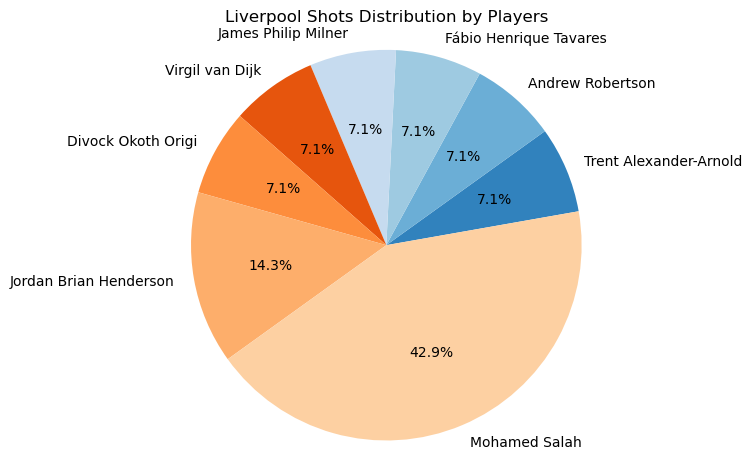

Mohamed Salah             6
Jordan Brian Henderson    2
Trent Alexander-Arnold    1
Andrew Robertson          1
Fábio Henrique Tavares    1
James Philip Milner       1
Virgil van Dijk           1
Divock Okoth Origi        1
Name: player_name, dtype: int64


In [14]:
explode = (0, 0, 0, 0 , 0, 0, 0, 0)  
colors = plt.cm.tab20c.colors  

liverpool_shots['player_name'].value_counts().sort_values(ascending=True).plot.pie(explode=explode, colors=colors, autopct='%1.1f%%', startangle=10)
plt.title('Liverpool Shots Distribution by Players')  
plt.ylabel(None)  
plt.axis('equal')  
plt.tight_layout()  
plt.show()

print(liverpool_shots['player_name'].value_counts())

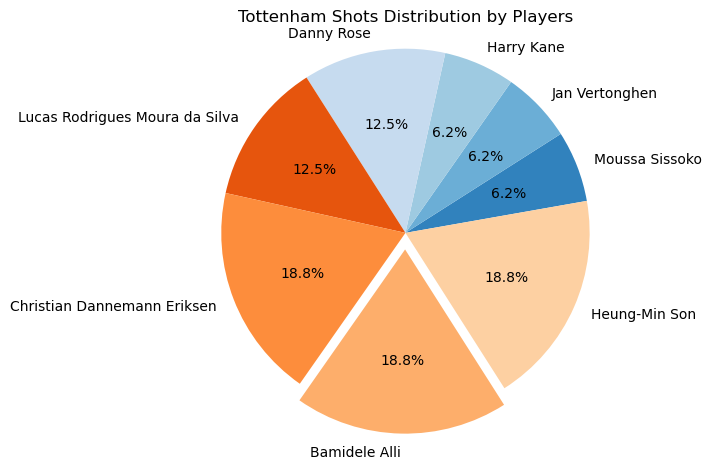

Christian Dannemann Eriksen       3
Bamidele Alli                     3
Heung-Min Son                     3
Danny Rose                        2
Lucas Rodrigues Moura da Silva    2
Moussa Sissoko                    1
Jan Vertonghen                    1
Harry Kane                        1
Name: player_name, dtype: int64


In [15]:
explode = (0, 0, 0, 0 , 0, 0, 0.09, 0)  
colors = plt.cm.tab20c.colors  

tottenham_shots['player_name'].value_counts().sort_values(ascending=True).plot.pie(explode=explode, colors=colors, autopct='%1.1f%%', startangle=10)
plt.title('Tottenham Shots Distribution by Players')  
plt.ylabel(None)  
plt.axis('equal')  
plt.tight_layout() 
plt.show()

print(tottenham_shots['player_name'].value_counts())

## Shot Maps

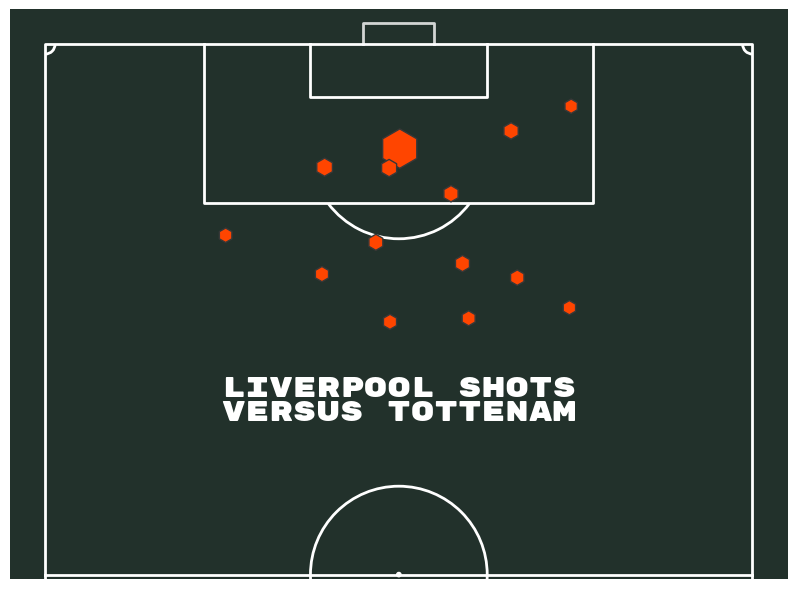

In [16]:
pitch = VerticalPitch(pad_bottom=0.5, 
                      half=True, 
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='#22312b', corner_arcs=True, line_color='white') 
fig, ax = pitch.draw(figsize=(12, 6))

sc = pitch.scatter(liverpool_shots.x, liverpool_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(liverpool_shots['shot_statsbomb_xg']* 900) + 100,
                   c='orangered', 
                   edgecolors='#383838',  
                   marker='h',
                   ax=ax)
txt = ax.text(x=40, y=80, s='Liverpool shots\nversus Tottenam',
              size=20,
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

In [17]:
tottenham_shots['player_name'].value_counts()

Christian Dannemann Eriksen       3
Bamidele Alli                     3
Heung-Min Son                     3
Danny Rose                        2
Lucas Rodrigues Moura da Silva    2
Moussa Sissoko                    1
Jan Vertonghen                    1
Harry Kane                        1
Name: player_name, dtype: int64

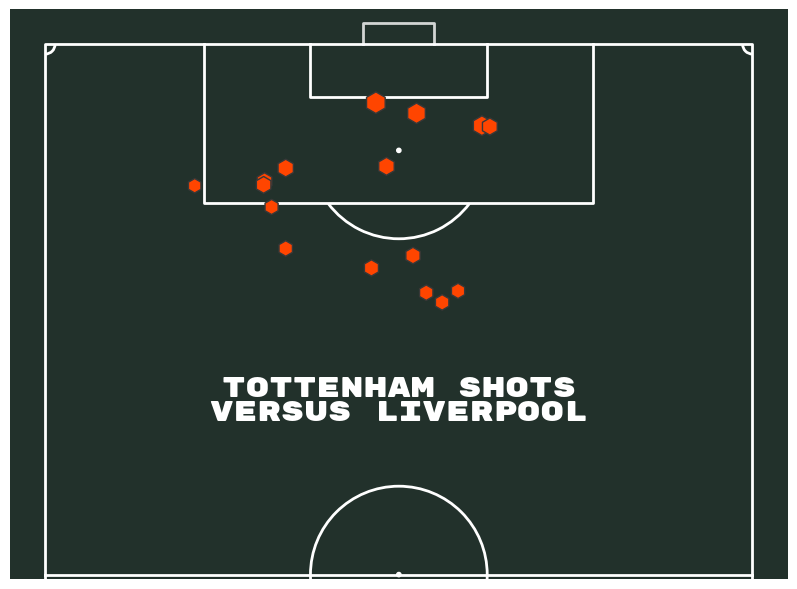

In [18]:
pitch = VerticalPitch(pad_bottom=0.5,  
                      half=True, 
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='#22312b', corner_arcs=True, line_color='white')  
fig, ax = pitch.draw(figsize=(12, 6))

sc = pitch.scatter(tottenham_shots.x, tottenham_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(tottenham_shots['shot_statsbomb_xg']* 900) + 100,
                   c= 'orangered',
                   edgecolors='#383838',  
                   marker='h',
                   ax=ax)
txt = ax.text(x=40, y=80, s='Tottenham shots\nversus Liverpool',
              size=20,
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

## Aerials Won

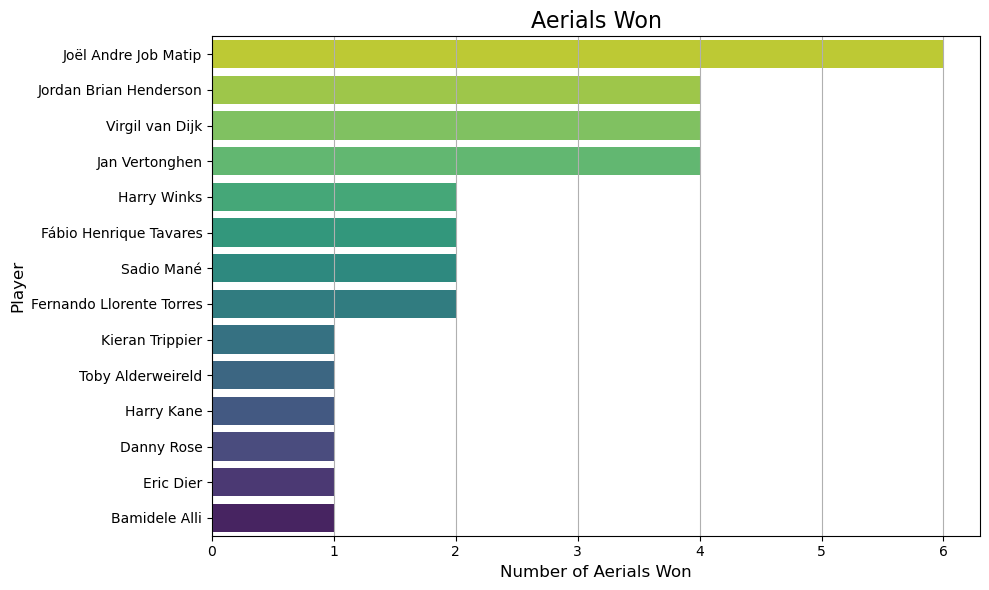

In [19]:
plt.figure(figsize=(10, 6))  
sns.countplot(y='player_name', data=df_event[df_event['aerial_won']==True], palette='viridis_r',
              order = df_event['player_name'][df_event['aerial_won']==True].value_counts().index)
plt.title('Aerials Won', fontsize=16) 
plt.xlabel('Number of Aerials Won', fontsize=12)  
plt.ylabel('Player', fontsize=12) 
plt.grid(True, axis='x')  
plt.tight_layout()  
plt.show()

## Passing Networks

In [20]:
df_event.loc[df_event.tactics_formation.notnull(), 'tactics_id'] = df_event.loc[
    df_event.tactics_formation.notnull(), 'id']
df_event[['tactics_id', 'tactics_formation']] = df_event.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

In [21]:
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
df_tactics['position_abbreviation'] = df_tactics.position_id.map(formation_dict)

In [22]:
sub = df_event.loc[df_event.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = df_tactics.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([df_tactics, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

In [23]:
events = df_event.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [24]:
events.groupby('team_name').tactics_formation.unique()

team_name
Liverpool            [433, 4141]
Tottenham Hotspur    [4231, 442]
Name: tactics_formation, dtype: object

In [25]:
TEAM = 'Liverpool'
OPPONENT = 'versus Tottenham, 2018/19 Champions League Final'
FORMATION = '433'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

In [26]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

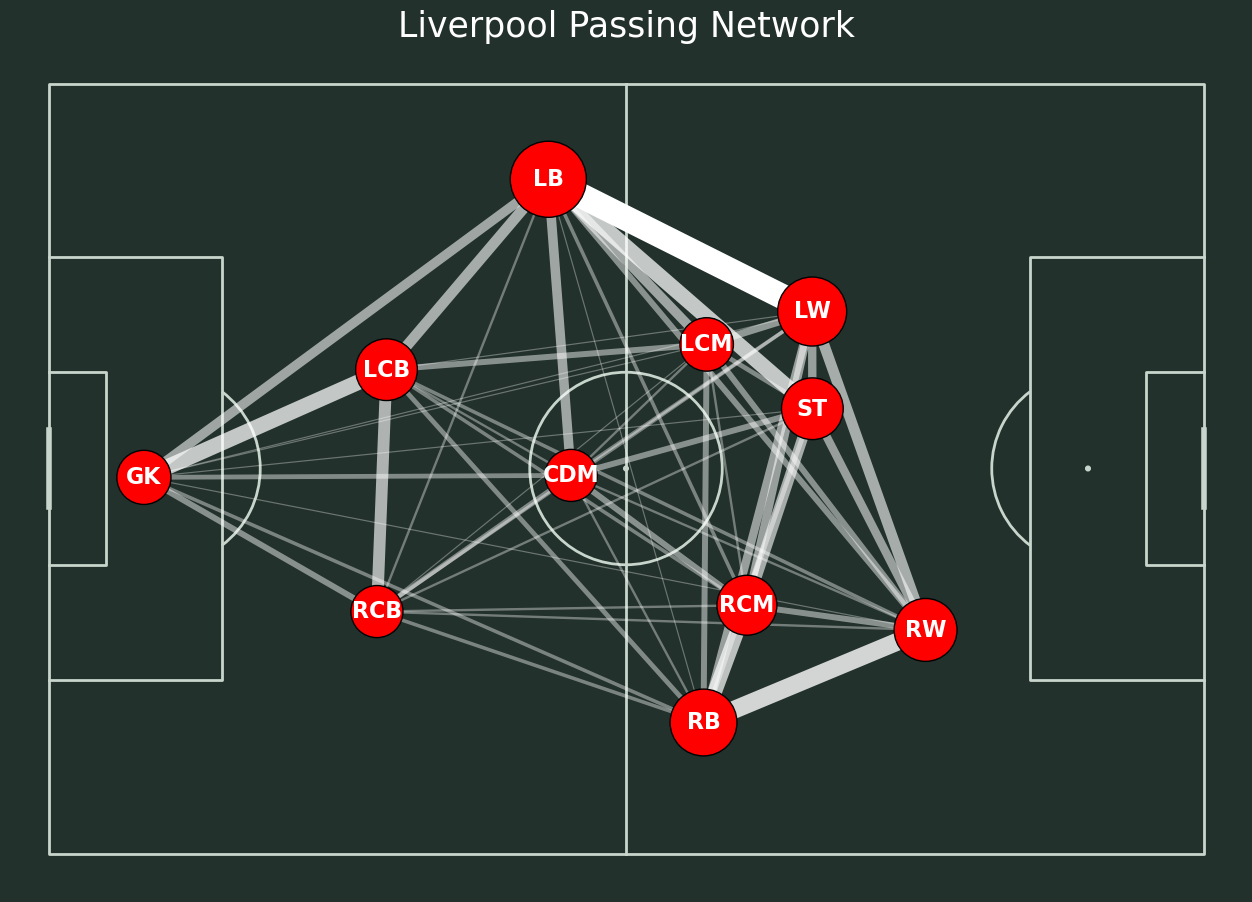

In [27]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
    
ax_title = ax.set_title(f'Liverpool Passing Network', fontsize=25, color='white')

In [28]:
TEAM = 'Tottenham Hotspur'
OPPONENT = 'versus Tottenham, 2018/19 Champions League Final'
FORMATION = '4231'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

In [29]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

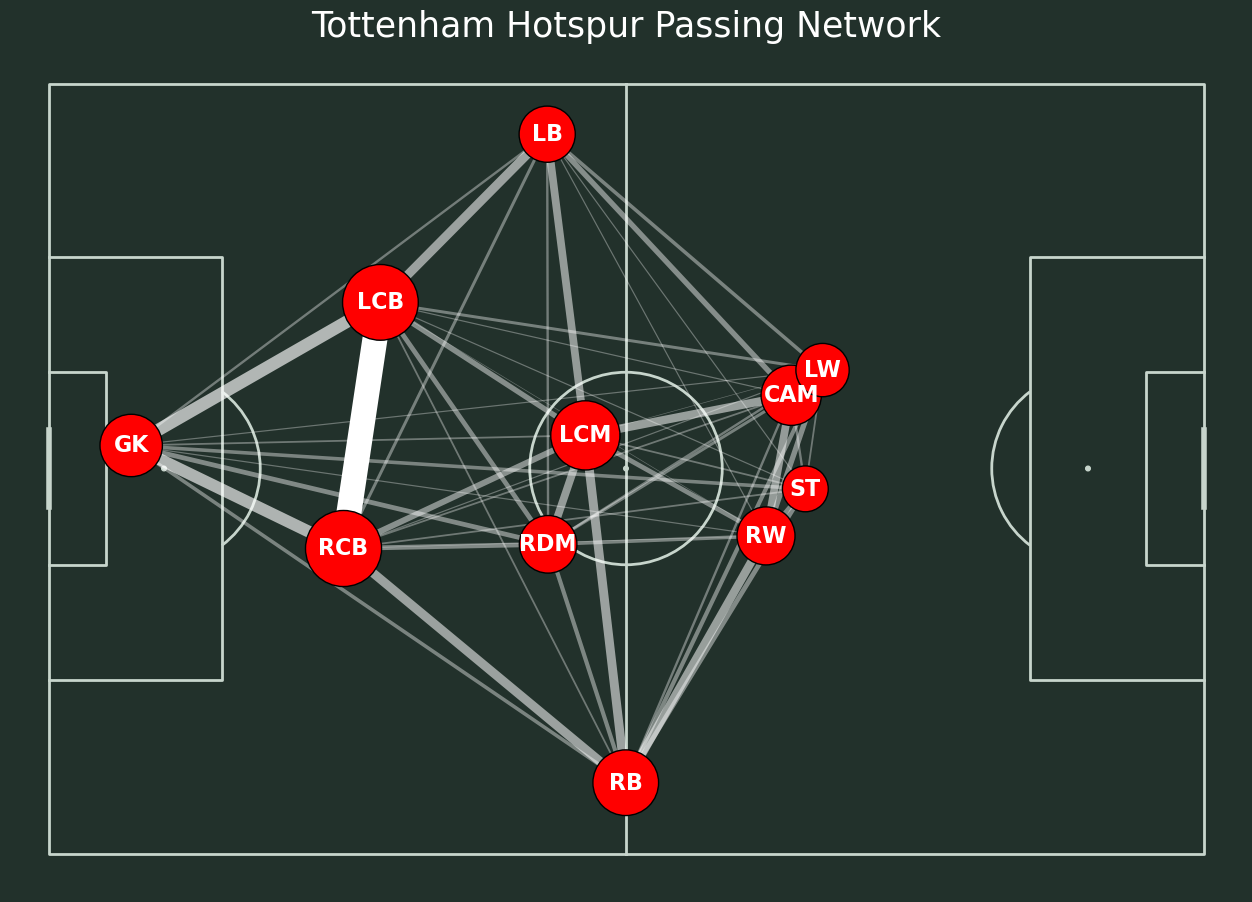

In [30]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)

ax_title = ax.set_title(f'Tottenham Hotspur Passing Network', fontsize=25, color='white')

## Passing Arrows

In [31]:
team1_pass = df_event[(df_event['type_name']=='Pass') & (df_event['team_id']==24)]
team2_pass = df_event[(df_event['type_name']=='Pass') & (df_event['team_id']==38)]

In [32]:
team1_pass = team1_pass[['x', 'y', 'end_x', 'end_y', 'outcome_name']]
team2_pass = team2_pass[['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = team1_pass.outcome_name.isnull()
mask_complete1 = team2_pass.outcome_name.isnull()

In [33]:
team1_pass.head()

,x,y,end_x,end_y,outcome_name
4,61.0,40.1,34.0,43.8,NaN
7,36.1,44.0,86.6,3.5,Incomplete
11,65.6,14.2,82.8,17.1,Incomplete
16,75.2,19.4,86.4,20.3,Incomplete
20,59.5,19.6,65.4,19.2,NaN


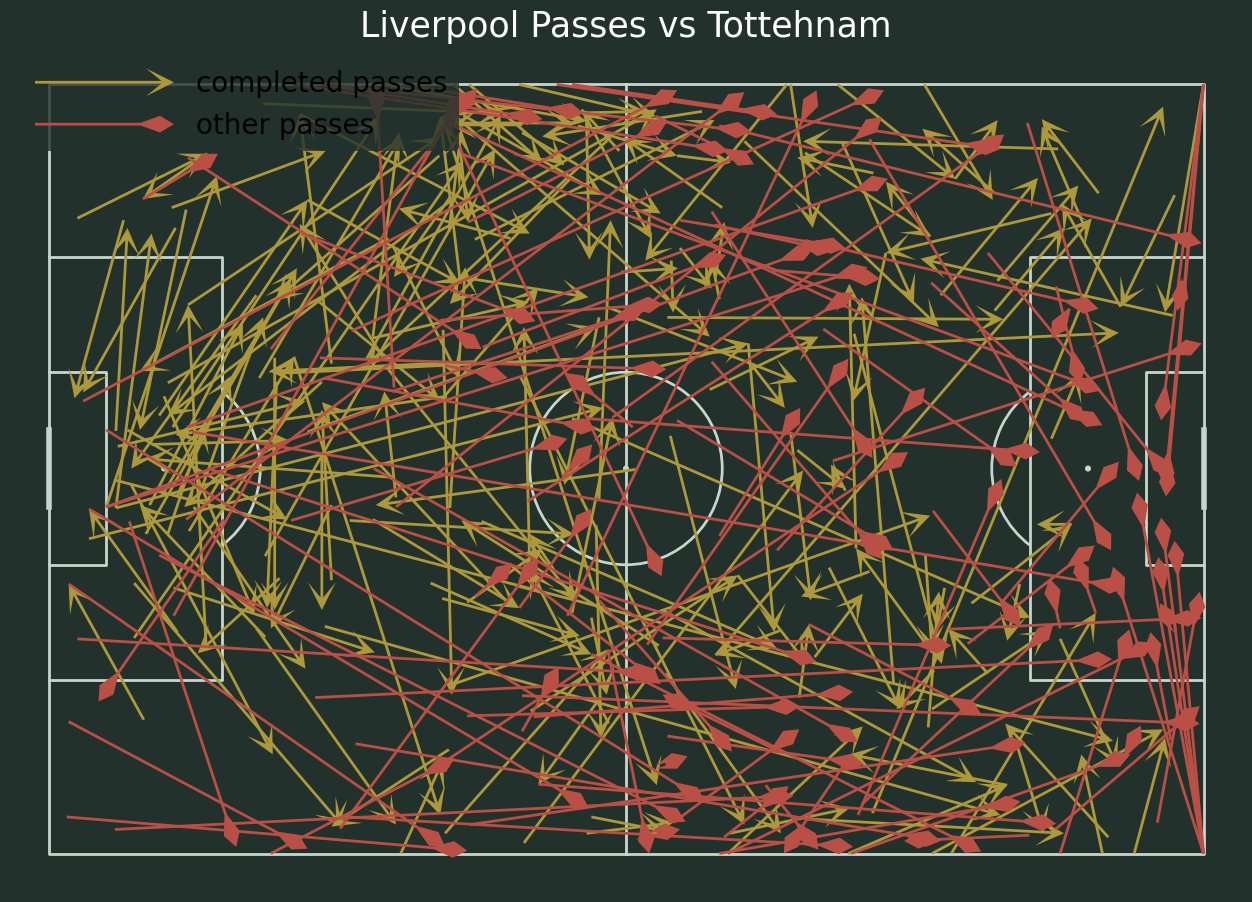

In [34]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# completed passes
pitch.arrows(team1_pass[mask_complete].x, team1_pass[mask_complete].y,
             team1_pass[mask_complete].end_x, team1_pass[mask_complete].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# other passes
pitch.arrows(team1_pass[~mask_complete].x, team1_pass[~mask_complete].y,
             team1_pass[~mask_complete].end_x, team1_pass[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

ax_title = ax.set_title(f'Liverpool Passes vs Tottehnam', fontsize=25, color='white')

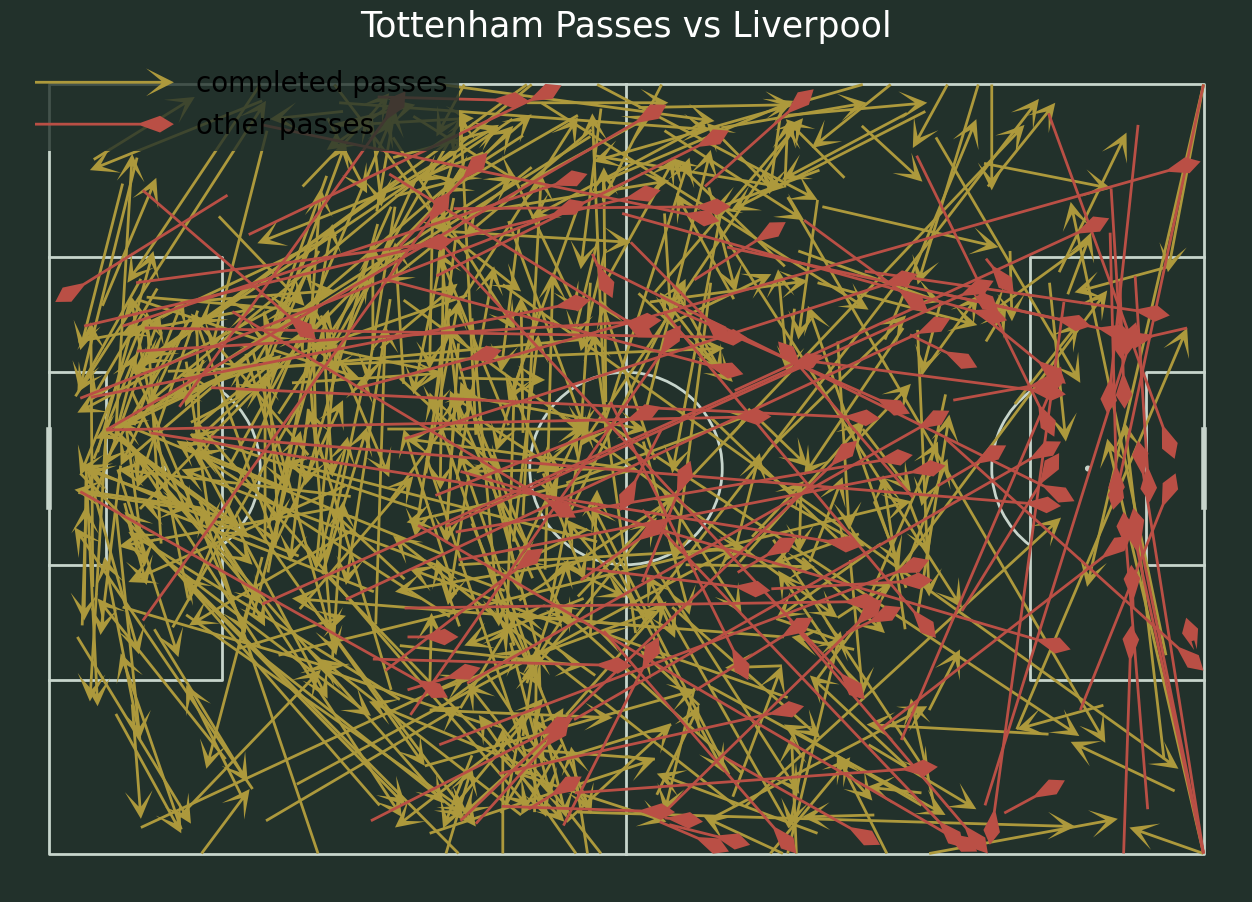

In [35]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# completed passes
pitch.arrows(team2_pass[mask_complete1].x, team2_pass[mask_complete1].y,
             team2_pass[mask_complete1].end_x, team2_pass[mask_complete1].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# other passes
pitch.arrows(team2_pass[~mask_complete1].x, team2_pass[~mask_complete1].y,
             team2_pass[~mask_complete1].end_x, team2_pass[~mask_complete1].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
ax_title = ax.set_title(f'Tottenham Passes vs Liverpool', fontsize=25, color='white')

## Pressure Heatmaps

In [36]:
mask_team1_pressure = (df_event.team_id == 24) & (df_event.type_name == 'Pressure')
df_pressure1 = df_event.loc[mask_team1_pressure, ['x', 'y']]
mask_team1_pressure = (df_event.team_id == 24) & (df_event.type_name == 'Pass')
df_pass1 = df_event.loc[mask_team1_pressure, ['x', 'y', 'end_x', 'end_y']]

mask_team2_pressure = (df_event.team_id == 38) & (df_event.type_name == 'Pressure')
df_pressure2 = df_event.loc[mask_team2_pressure, ['x', 'y']]
mask_team2_pressure = (df_event.team_id == 38) & (df_event.type_name == 'Pass')
df_pass2 = df_event.loc[mask_team2_pressure, ['x', 'y', 'end_x', 'end_y']]

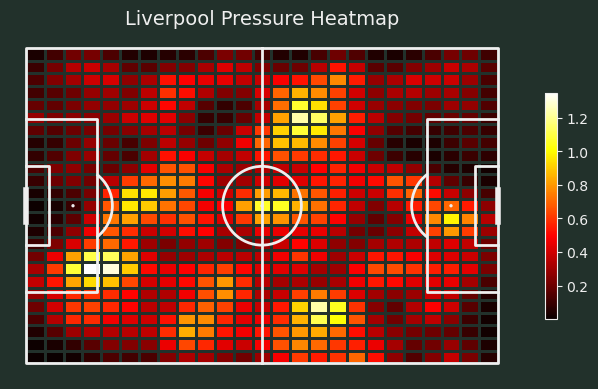

In [37]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')

fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(df_pressure1.x, df_pressure1.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
ax.set_title('Liverpool Pressure Heatmap', color='#efefef', fontsize=14)
plt.show()

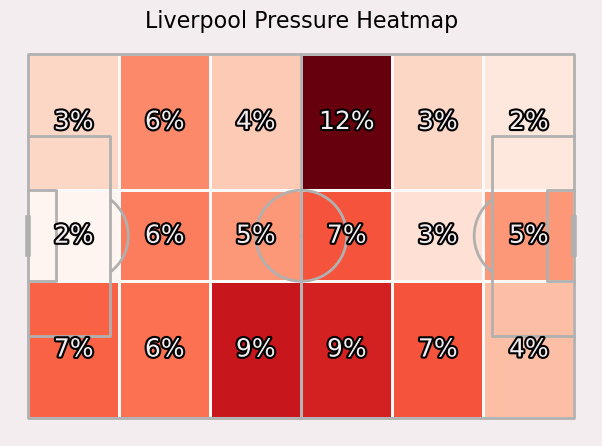

In [38]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(6.125, 6))
fig.set_facecolor('#f4edf0')
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_pressure1.x, df_pressure1.y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)
ax.set_title('Liverpool Pressure Heatmap', color='black', fontsize=16)
plt.show()

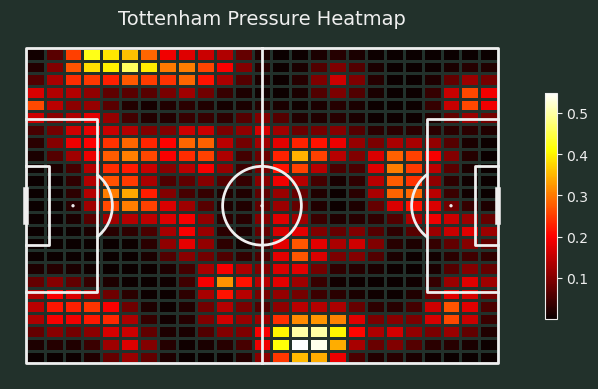

In [39]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')

fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(df_pressure2.x, df_pressure2.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
ax.set_title('Tottenham Pressure Heatmap', color='#efefef', fontsize=14)
plt.show()

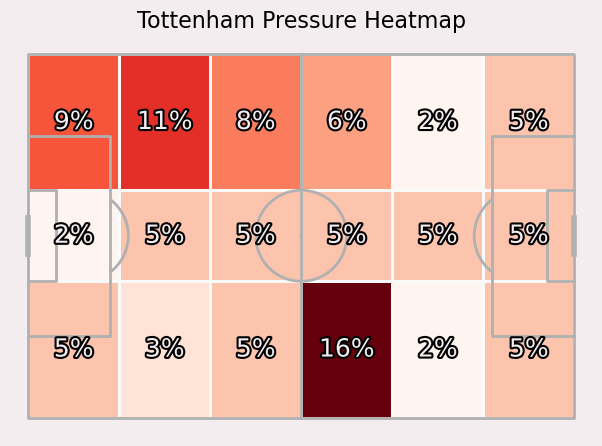

In [40]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(6.125, 6))
fig.set_facecolor('#f4edf0')
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_pressure2.x, df_pressure2.y, statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff)
ax.set_title('Tottenham Pressure Heatmap', color='black', fontsize=16)
plt.show()